<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 3</a></span></li></ul></div>

<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [60]:
# !pip install yfinance
!pip install xlsxwriter

     -------------------------------------- 152.8/152.8 kB 1.0 MB/s eta 0:00:00


In [61]:
import yfinance as yf
import pandas as pd
import requests
from tqdm.auto import tqdm
import time
import datetime
import matplotlib.pyplot as plt
import xlsxwriter

In [4]:
crude_oil_ticker = "CL=F"
crude_oil = yf.Ticker(crude_oil_ticker)
# hist = crude_oil.history()
oil_data = yf.download(crude_oil_ticker)

[*********************100%***********************]  1 of 1 completed


In [5]:
eurusd_ticker = "EURUSD=X"
eurusd = yf.Ticker(eurusd_ticker)
eurusd_data = yf.download(eurusd_ticker)

[*********************100%***********************]  1 of 1 completed


In [6]:
#  Очищаем данные по цене на нефть и курсам доллар-евро
# берем за последний год и только цену закрытия
oil_data = oil_data['Close'].copy()
eurusd_data = eurusd_data['Close'].copy()

current_day = datetime.datetime.today().date()
year_ago_day = current_day-datetime.timedelta(days=365)
current_day = datetime.datetime.strftime(current_day, '%Y-%m-%d')
year_ago_day = datetime.datetime.strftime(year_ago_day, '%Y-%m-%d')

oil_data = oil_data[year_ago_day:current_day].copy()
eurusd_data = eurusd_data[year_ago_day:current_day].copy()

In [7]:
oil_eurusd_data = pd.concat([oil_data, eurusd_data], axis=1, keys=['Oil_price','Euro_rate'])
oil_eurusd_data

,Oil_price,Euro_rate
Date,,
2022-03-30,107.820000,1.109152
2022-03-31,100.279999,1.116184
2022-04-01,99.269997,1.107236
2022-04-04,103.279999,1.104728
2022-04-05,101.959999,1.097586
...,...,...
2023-03-24,69.260002,1.083506
2023-03-27,72.809998,1.077819
2023-03-28,73.199997,1.080707


In [33]:
# берем среднее по месяцам для формирования коммерческого предложения
month_oil_df = pd.concat([oil_data.resample('M').mean(), eurusd_data.resample('M').mean()], axis=1, keys=['Oil_price','Euro_rate'])
month_oil_df['CK_price'] = month_oil_df.Oil_price*10+month_oil_df.Euro_rate*PRODUCTION_COST
month_oil_df

,Oil_price,Euro_rate,CK_price
Date,,,
2022-03-31,104.049999,1.112668,1485.567017
2022-04-30,101.640499,1.082745,1449.502796
2022-05-31,109.259523,1.057322,1515.524189
2022-06-30,114.154091,1.057670,1564.608731
2022-07-31,99.384500,1.019509,1401.648619
2022-08-31,91.482609,1.012799,1319.945681
2022-09-30,83.801905,0.991166,1234.485568
2022-10-31,87.030952,0.983970,1263.897686
2022-11-30,84.385715,1.018547,1251.275922


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [8]:

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Сonty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Ant':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


In [9]:
def discount_percent(volume: int)->int:
    if volume < 0 :
        return 0.0
    if volume < 99 :
        return 0.01
    if volume < 299 :
        return 0.05
    if volume > 300 :
        return 0.1


In [10]:
# цены за 1 тонну СК
ck_data = oil_eurusd_data.copy()
ck_data['CK_price'] = ck_data.Oil_price*10+ck_data.Euro_rate*PRODUCTION_COST
ck_data

,Oil_price,Euro_rate,CK_price
Date,,,
2022-03-30,107.820000,1.109152,1521.860638
2022-03-31,100.279999,1.116184,1449.273396
2022-04-01,99.269997,1.107236,1435.594282
2022-04-04,103.279999,1.104728,1474.691277
2022-04-05,101.959999,1.097586,1458.634548
...,...,...,...
2023-03-24,69.260002,1.083506,1126.002321
2023-03-27,72.809998,1.077819,1159.227381
2023-03-28,73.199997,1.080707,1164.282846


<Axes: xlabel='Date'>

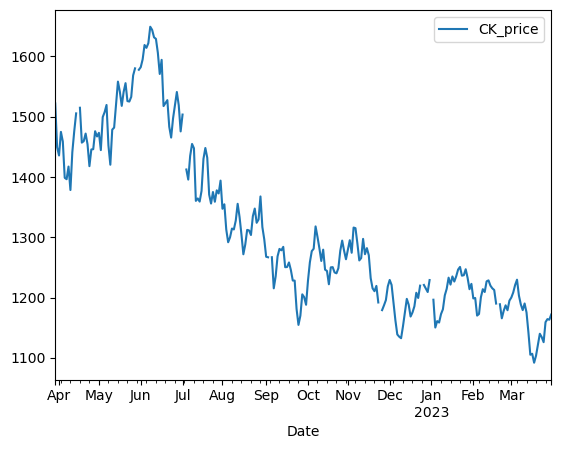

In [11]:
# График себестоимости
ck_data.plot(y='CK_price')

### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [12]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
year = '2022'
month = '05'
url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj)
df.head(10)

,date,grade,masa,rm,us,tone
0,2022-05-31,SMR CV,Noon,1157.50,269.20,Slightly steadier
1,2022-05-31,SMR L,Noon,1147.50,266.90,Slightly steadier
2,2022-05-31,SMR 5,Noon,740.00,172.10,Slightly steadier
3,2022-05-31,SMR GP,Noon,737.00,171.40,Slightly steadier
4,2022-05-31,SMR 10,Noon,730.00,169.80,Slightly steadier
5,2022-05-31,SMR 20,Noon,728.00,169.30,Slightly steadier
6,2022-05-31,Latex in Bulk,Noon,682.50,682.50,Slightly steadier
7,2022-05-30,SMR CV,Noon,1152.50,267.60,Steady
8,2022-05-30,SMR L,Noon,1142.50,265.25,Steady
9,2022-05-30,SMR 5,Noon,731.50,169.85,Steady


In [13]:
# выбирраем данные за последний год
url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month=01&year=2000"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj) 
df = df[0:0] # берем только заголовки
end = datetime.datetime.today().date()
start = end-datetime.timedelta(days=365)
period_df = pd.date_range(start, end, freq = 'M')
period_lst = period_df.to_pydatetime().tolist()
for i in tqdm(period_lst):
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={str(i.month)}&year={str(i.year)}"
#     try:
    res = requests.get(url)
#     except:
#          print(res)
#          time.sleep(240)
#          res = requests.get(url)
    rj = res.json()
    df1 = pd.json_normalize(rj)
    df = pd.concat([df, df1], ignore_index=True)
#     if period_lst.index(i) %  == 0 :
    time.sleep(3)

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
# убираем пустые значения
t_df = df.copy()
t_df = t_df[t_df['us'] != '']
# Получаем цену в долларах за тоннах (умножаем на 1000 и делим 100 т.е. *10) 
t_df['Rubber_Price'] = t_df['us'].apply(lambda i:float(i)*10)

In [15]:
t_df

,date,grade,masa,rm,us,tone,Rubber_Price
0,2022-03-31,SMR CV,Noon,1137.50,275.15,Quietly Steady,2751.5
1,2022-03-31,SMR L,Noon,1127.50,272.75,Quietly Steady,2727.5
2,2022-03-31,SMR 5,Noon,735.50,177.90,Quietly Steady,1779.0
3,2022-03-31,SMR GP,Noon,732.50,177.20,Quietly Steady,1772.0
4,2022-03-31,SMR 10,Noon,725.50,175.50,Quietly Steady,1755.0
...,...,...,...,...,...,...,...
1689,2023-02-02,SMR 5,Noon,607.50,146.15,Quiet,1461.5
1690,2023-02-02,SMR GP,Noon,604.50,145.40,Quiet,1454.0
1691,2023-02-02,SMR 10,Noon,597.50,143.75,Quiet,1437.5
1692,2023-02-02,SMR 20,Noon,595.50,143.25,Quiet,1432.5


In [16]:
# убираем лишние стоблцы
t_df = t_df.drop([ 'masa', 'rm', 'us', 'tone'], axis=1)

In [17]:
t_df

,date,grade,Rubber_Price
0,2022-03-31,SMR CV,2751.5
1,2022-03-31,SMR L,2727.5
2,2022-03-31,SMR 5,1779.0
3,2022-03-31,SMR GP,1772.0
4,2022-03-31,SMR 10,1755.0
...,...,...,...
1689,2023-02-02,SMR 5,1461.5
1690,2023-02-02,SMR GP,1454.0
1691,2023-02-02,SMR 10,1437.5
1692,2023-02-02,SMR 20,1432.5


In [18]:
# разворачиваем цены разного кауча по столбцам
grade_df = t_df.pivot_table('Rubber_Price', ['date'], 'grade')
grade_df

grade,Latex in Bulk,SMR 10,SMR 20,SMR 5,SMR CV,SMR GP,SMR L
date,,,,,,,
2022-03-01,7080.0,1774.0,1769.0,1798.0,2908.0,1791.0,2884.0
2022-03-02,7135.0,1804.0,1799.5,1828.5,2930.0,1821.0,2905.5
2022-03-03,7170.0,1821.5,1816.5,1846.0,2949.0,1838.5,2925.0
2022-03-04,7095.0,1768.5,1764.0,1793.0,2919.5,1785.5,2895.0
2022-03-07,7120.0,1783.0,1778.0,1807.5,2935.0,1800.0,2910.5
...,...,...,...,...,...,...,...
2023-02-22,5355.0,1413.0,1408.5,1436.0,2088.0,1429.0,2065.0
2023-02-23,5385.0,1427.0,1422.5,1450.0,2100.0,1443.0,2077.0
2023-02-24,5380.0,1423.0,1418.5,1446.0,2102.0,1439.0,2079.0


In [19]:
# преобразуем поле date в даты и устанавливаем как индекс
lgm_df = grade_df.reset_index().copy()
lgm_df['date'] = lgm_df['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
type(lgm_df['date'][0])
lgm_df = lgm_df.set_index('date')

In [20]:
svod_df = lgm_df.merge(ck_data, how='inner',  left_index=True, right_index=True)

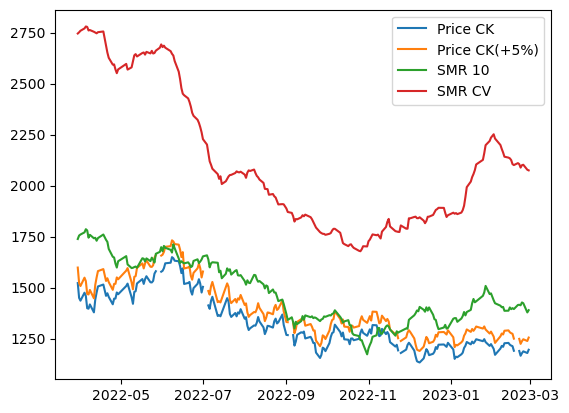

In [21]:
# грфафики цен на СК, для сравнения цена на дешевый(SMR 10) и дорогой(SMR CV) природный каучук
plt.plot(svod_df.index, svod_df['CK_price'])
#Оценив графики, поднял себестоимость на 5% :)))
plt.plot(svod_df.index, svod_df['CK_price']*1.05)
plt.plot(svod_df.index, svod_df['SMR 10'])
plt.plot(svod_df.index, svod_df['SMR CV'])
plt.legend(labels=['Price CK', 'Price CK(+5%)', 'SMR 10','SMR CV'])
plt.show()

<Axes: xlabel='Date'>

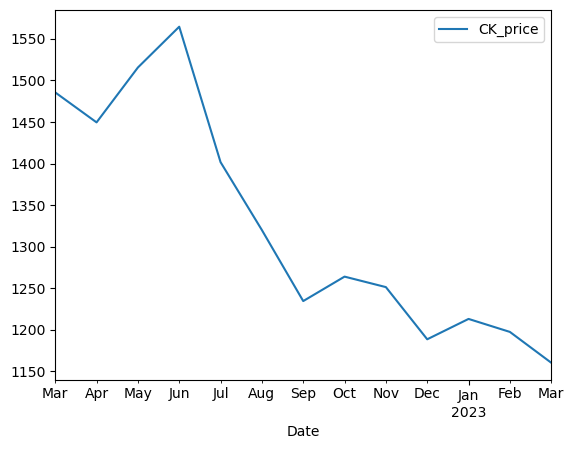

In [35]:
month_oil_df.plot(y='CK_price')

In [63]:
xlfilepath = 'CK_offer.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:    
    for client_name, client_info in customers.items():
        client_df =  offer_df.copy()
    
        if client_info.get('location') == 'EU':
          client_df['logistics'] = EU_LOGISTIC_COST_EUR
          client_df['logistics'] = client_df['Euro_rate'] * EU_LOGISTIC_COST_EUR
        elif client_info.get('location') == 'CN':
          client_df['logistics'] = CN_LOGISTIC_COST_USD

        if client_info.get('volumes'):
          client_df['volumes'] = client_info.get('volumes')

        client_df['discount'] = client_df['volumes'].apply(discount_percent)
        client_df['CK_price_usd'] = client_df['CK_price'] * (1-client_df['discount']) + client_df['logistics']

        client_df['CK_price_usd'].plot(color='red', linestyle="dashed")
        plt.title(f"Client {client_name} CK Price")
        plt.ylabel("USD")
        plt.tight_layout()
        plt.savefig(f'{client_name}_CK_price.png')
        plt.close()

        client_df = client_df.round(2)
        client_df = client_df.reset_index()
        client_df.Date = client_df.Date.dt.strftime('%B %Y')

        max_row, max_col = client_df.shape
        client_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets[client_name]
        column_settings = [{'header': column} for column in client_df.columns]
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
        worksheet.insert_image(max_row + 3, 1, f'{client_name}_CK_price.png')

# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [65]:
import os
import yfinance as yf
import pandas as pd
import requests
from tqdm.auto import tqdm
import time
import datetime
import matplotlib.pyplot as plt
import xlsxwriter

# берем данные по цене на нефть
crude_oil_ticker = "CL=F"
crude_oil = yf.Ticker(crude_oil_ticker)
oil_data = yf.download(crude_oil_ticker)
# берем данные о курсу евро
eurusd_ticker = "EURUSD=X"
eurusd = yf.Ticker(eurusd_ticker)
eurusd_data = yf.download(eurusd_ticker)

#  Очищаем данные по цене на нефть и курсам доллар-евро
# берем за последний год и только цену закрытия
oil_data = oil_data['Close'].copy()
eurusd_data = eurusd_data['Close'].copy()
current_day = datetime.datetime.today().date()
year_ago_day = current_day-datetime.timedelta(days=365)
current_day = datetime.datetime.strftime(current_day, '%Y-%m-%d')
year_ago_day = datetime.datetime.strftime(year_ago_day, '%Y-%m-%d')
oil_data = oil_data[year_ago_day:current_day].copy()
eurusd_data = eurusd_data[year_ago_day:current_day].copy()

# берем среднее по месяцам для формирования коммерческого предложения
month_oil_df = pd.concat([oil_data.resample('M').mean(), eurusd_data.resample('M').mean()], axis=1, keys=['Oil_price','Euro_rate'])
month_oil_df['CK_price'] = month_oil_df.Oil_price*10+month_oil_df.Euro_rate*PRODUCTION_COST

# по клиентам
clients_path = 'for_clients'
os.makedirs(clients_path, exist_ok=True)

for client_name, client_info in customers.items():
  client_df = month_oil_df.copy()
  
  if client_info.get('location') == 'EU':
    client_df['logistics'] = EU_LOGISTIC_COST_EUR
    client_df['logistics'] = client_df['Euro_rate'] * EU_LOGISTIC_COST_EUR
  elif client_info.get('location') == 'CN':
    client_df['logistics'] = CN_LOGISTIC_COST_USD
  
  if client_info.get('volumes'):
    client_df['volumes'] = client_info.get('volumes')

  client_df['discount'] = client_df['volumes'].apply(discount_percent)
  client_df['CK_price_usd'] = client_df['CK_price'] * (1-client_df['discount']) + client_df['logistics']
  
  client_df['CK_price_usd'].plot(color='red', linestyle="dashed")
  plt.title(f"Client {client_name} CK Price")
  plt.ylabel("USD")
  plt.tight_layout()
  plt.savefig(f'{client_name}_CK_price.png')
  plt.close()

  client_df = client_df.round(2)
  client_df = client_df.reset_index()
  client_df.Date = client_df.Date.dt.strftime('%B %Y')
  
  max_row, max_col = client_df.shape

  xlfilepath = os.path.join(clients_path, f'{client_name}_CK_prices.xlsx')
  with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
    client_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
    workbook = writer.book
    worksheet = writer.sheets[client_name]
    column_settings = [{'header': column} for column in client_df.columns]
    worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
    worksheet.insert_image(max_row + 3, 1, f'{client_name}_CK_price.png')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [66]:
# Получаем средние значения по месяцам курсов евро и доллара к рублю с сайта Центробанка
# за последний год 
current_day = datetime.datetime.today().date()
date_lst = [current_day-datetime.timedelta(days=i) for i in range(365)]
date_lst = sorted(date_lst)
date = current_day-datetime.timedelta(days=365)
fdate=datetime.datetime.strftime(date, '%d-%m-%Y')
url = f"http://www.cbr.ru/scripts/XML_daily.asp?date_req={fdate}"
res = requests.get(url)
rj = res.text
rate_df = pd.read_xml(rj)
rate_df = rate_df[(rate_df['NumCode'] == 840) | (rate_df['NumCode'] == 978)]
rate_df['Date'] = date
for i in tqdm(date_lst):
    fdate=datetime.datetime.strftime(i, '%d-%m-%Y')
    url = f"http://www.cbr.ru/scripts/XML_daily.asp?date_req={fdate}"
    res = requests.get(url)
    rj = res.text
    df = pd.read_xml(rj)
    df = df[(df['NumCode'] == 840) | (df['NumCode'] == 978)]
    df['Date'] = i
    rate_df = pd.concat([rate_df,df])

rate_df['Date'] = rate_df['Date'].astype("datetime64[ns]")
rate_df['Value'] = rate_df['Value'].apply(lambda x:float(x.replace(',','.')))
rate_df = rate_df.reset_index()
rate_df = rate_df.set_index(['Date'])
rate_df = rate_df[['CharCode','Value']]
rate_df = rate_df.pivot(columns='CharCode',values = 'Value')
rate_df = rate_df.resample('M').mean()
rate_df

  0%|          | 0/365 [00:00<?, ?it/s]

CharCode,EUR,USD
Date,,
2022-03-31,94.852250,85.184700
2022-04-30,84.588663,77.914557
2022-05-31,67.626332,64.776987
2022-06-30,60.182637,57.269417
2022-07-31,59.109713,58.151513
2022-08-31,61.026758,60.352229
2022-09-30,59.288300,59.800640
2022-10-31,59.646913,60.906352
2022-11-30,61.869623,60.878093


<Axes: xlabel='Date'>

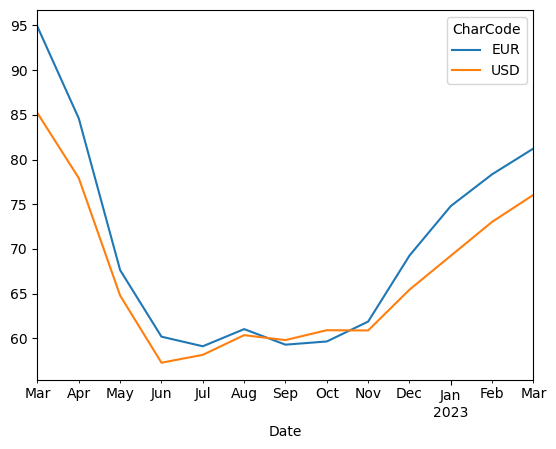

In [94]:
rate_df.plot(y=['EUR','USD'])


In [91]:
# джойним цена на каучук в доллар с курсами евро и доллар
rus_price_df = pd.merge(month_oil_df, rate_df, how='inner', left_index=True, right_index=True)
rus_price_df['Discount'] = discount_percent(0)
rus_price_df['CK_price_rub']=rus_price_df['CK_price']*rus_price_df['USD']*(1-discount_percent(0))
rus_price_df = rus_price_df[['CK_price','USD','Discount','CK_price_rub']]
# > df.rename(columns={"A": "a", "B": "c"})
rus_price_df = rus_price_df.rename(columns={'CK_price':'CK_price_usd','USD':'Rate USD'})
rus_price_df

,CK_price_usd,Rate USD,Discount,CK_price_rub
Date,,,,
2022-03-31,1485.567017,85.184700,0.01,125282.104833
2022-04-30,1449.502796,77.914557,0.01,111807.994038
2022-05-31,1515.524189,64.776987,0.01,97189.379930
2022-06-30,1564.608731,57.269417,0.01,88708.187058
2022-07-31,1401.648619,58.151513,0.01,80692.907885
2022-08-31,1319.945681,60.352229,0.01,78865.047384
2022-09-30,1234.485568,59.800640,0.01,73084.796769
2022-10-31,1263.897686,60.906352,0.01,76209.602898
2022-11-30,1251.275922,60.878093,0.01,75413.539466


In [92]:
# формируем файл для русского клиента со склада
xlfilepath = 'CK_offer_rus.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:    
        client_df =  rus_price_df.copy()
        client_df['CK_price_rub'].plot(color='red', linestyle="dashed")
        plt.title(f"Client RUS CK Price")
        plt.ylabel("RUB")
        plt.tight_layout()
        plt.savefig(f'RUS_CK_price.png')
        plt.close()

        client_df = client_df.round(2)
        client_df = client_df.reset_index()
        client_df.Date = client_df.Date.dt.strftime('%B %Y')

        max_row, max_col = client_df.shape
        client_df.to_excel(writer, sheet_name='RUS', startrow=1, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets['RUS']
        column_settings = [{'header': column} for column in client_df.columns]
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
        worksheet.insert_image(max_row + 3, 1, f'RUS_CK_price.png')